# Mining Netflix 

According to [Wikipedia](https://en.m.wikipedia.org/wiki/Netflix), Netflix, Inc. is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.As of April 2019, Netflix had over 148 million paid subscriptions worldwide, including 60 million in the United States, and over 154 million subscriptions total including free trials.

While Netflix was launched in India few years ago,keeping in mind the largest internet and smartphone market,inorder to expand its customer base to tire 1 and tire 2 cities ,it launched its first mobile only subscription plan of Rs.199/USD 2.81 per month.India is the only market where Netflix has launched this mobile only plan.The base netflix plan in India costs around Rs.499/USD 7.04 per month - the most expensive compared to Amazon prime (Rs.129/USD 1.82 per month) and Hotstar(Rs.299/USD 4.22 per month).

The content library of Netflix is one of the most outstanding and has appeal to all sections of people.Also, the streaming quality,the advantages of binge-watching,ever rising price of movie tickes(and popcorns!!!) are some of the reasons for the people to prefer OTT platforms like Netflix.

The data provided here lists movies and TV shows found in Netflix along with their cast,rating and other details.We will explore this content and mine interesting insights.

I have also published a [tableau workbook](https://public.tableau.com/profile/deepak.kumar5649#!/vizhome/NetflixMovieandShowAnalysis/Introduction) accompanying this kernel . Feel feel to check that out and let me know if you like my work.

In [44]:
%%HTML

<div class='tableauPlaceholder' id='viz1588308320617' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;NetflixMovieandShowAnalysis&#47;Introduction&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='NetflixMovieandShowAnalysis&#47;Introduction' /><param name='tabs' value='yes' /><param name='toolbar' value='no' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;NetflixMovieandShowAnalysis&#47;Introduction&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1588308320617');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Loading the library and  data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
kaggle=0

if kaggle==0:
    data=pd.read_csv('../data/netflix_titles.csv')
else:
    data=pd.read_csv('../input/netflix-shows/netflix_titles.csv')

## Summary of the data

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 7787 rows and 12 columns


In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
### Checking the null values:

data.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

* From the above datatype description we see that the release_year is of integer type,date added is object type whose datatype should have been date .
* When we check the null values , we see that there are 5 columns having null values - director,cast,country,date_added and rating.



In [7]:
### Changing the date added and release_year to date:

data['date_added']=pd.to_datetime(data['date_added'])
data['release_year']=pd.to_datetime(data['release_year'],format="%Y")
data['release_year']=data['release_year'].dt.year

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Exploratory Data Analysis

### Number of titles

In [9]:
## Check the number of titles present in the dataset:

print(f'There are {data.show_id.nunique()} shows in the netflix dataset')

There are 7787 shows in the netflix dataset


We understand that each row is a unique title .Lets check the categories of titles available.

In [10]:
(data['type'].value_counts()/data.shape[0])*100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

69 % of the titles in this dataset is of Movie type whereas 30 % is of TV show type.

### Number of titles by date addded:

Lets create two columns - year added and month added and understand the trend of titles added in the platform.

In [11]:
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [12]:
data['year_added'].value_counts().sort_index()

2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: year_added, dtype: int64

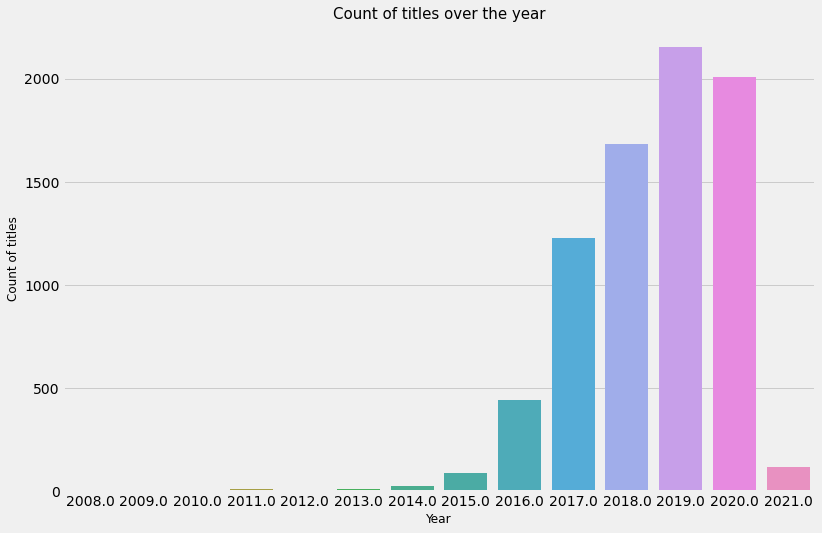

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data)
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year",fontsize=15)
plt.show()

From the plot above , we understand that the number of titles over the years have increased.Lets plot the same with respect to the type of title. - Movie or TV Show.

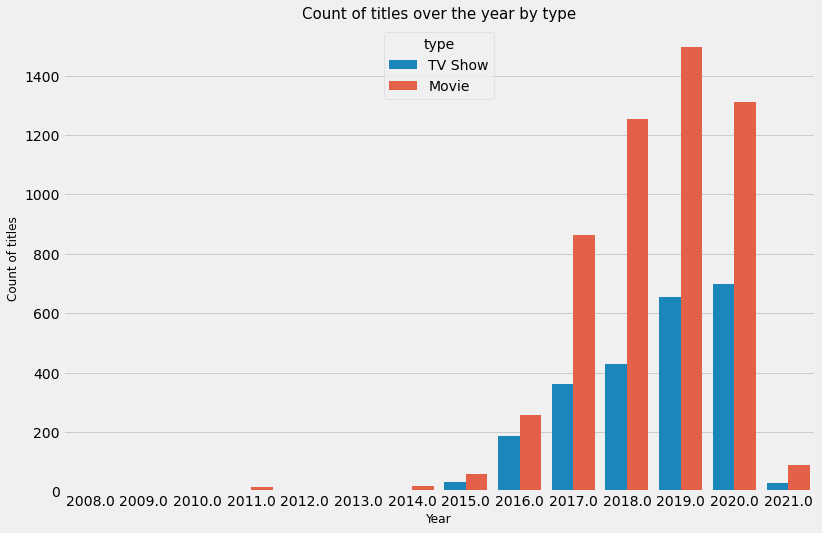

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data,hue='type')
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year by type",fontsize=15)
plt.show()

Clearly , we understand that the number of tv shows added to the platform has increased over the years whereas the numer of movies has hit a peak in 2019 and seen a dip in 2020.Lets check the growth of the TV shows over the year and which year has seen the highest growth.

In [15]:
tvshow=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

In [16]:
tvshow.pct_change()

2008.0         NaN
2013.0    4.000000
2014.0    0.200000
2015.0    4.000000
2016.0    5.166667
2017.0    0.951351
2018.0    0.191136
2019.0    0.525581
2020.0    0.062500
2021.0   -0.958393
Name: year_added, dtype: float64

There has been a 5.16 % increase in TV shows in the year 2016.

### Number of titles by month added:

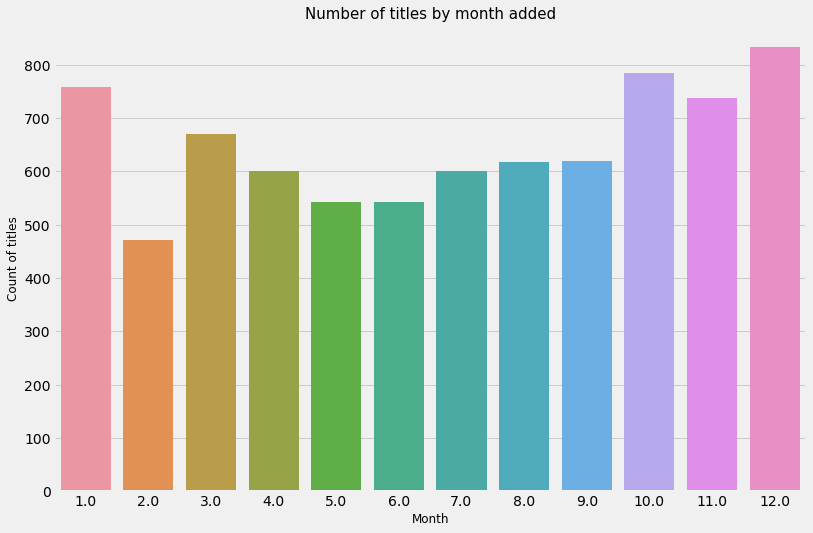

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data)
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

Maximum titles were added between the month of Oct-Dec.Lets check whether the trend is change is different between TV show and movie title.

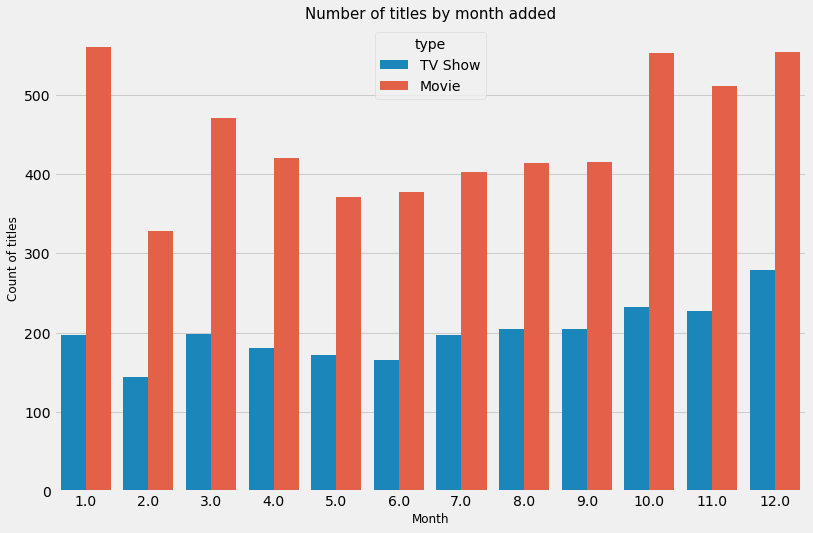

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data,hue='type')
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

The trend is the same for TV show and movie titles.Oct-Dec were the months where most of the titles were added.

### Movie/TV Show Listing

From the summary of the data , there is a column called listed_in which specifies what is the genre of each of the movies.There are multiple genres for a single title.Lets check how is the genre distributed in this dataset.

In [19]:
data['listed_in']=data['listed_in'].astype('str')
data['num_listing']=data['listed_in'].apply(lambda x:len(x.split(",")))

In [20]:
listing=set()
count_listings=Counter()

for listings in data['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

In [21]:
listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)

In [22]:
data['num_listing'].describe()

count    7787.000000
mean        2.192243
std         0.786086
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: num_listing, dtype: float64

In [23]:
print(f'There are {len(listings_title)} genres in the database')

There are 42 genres in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies')])

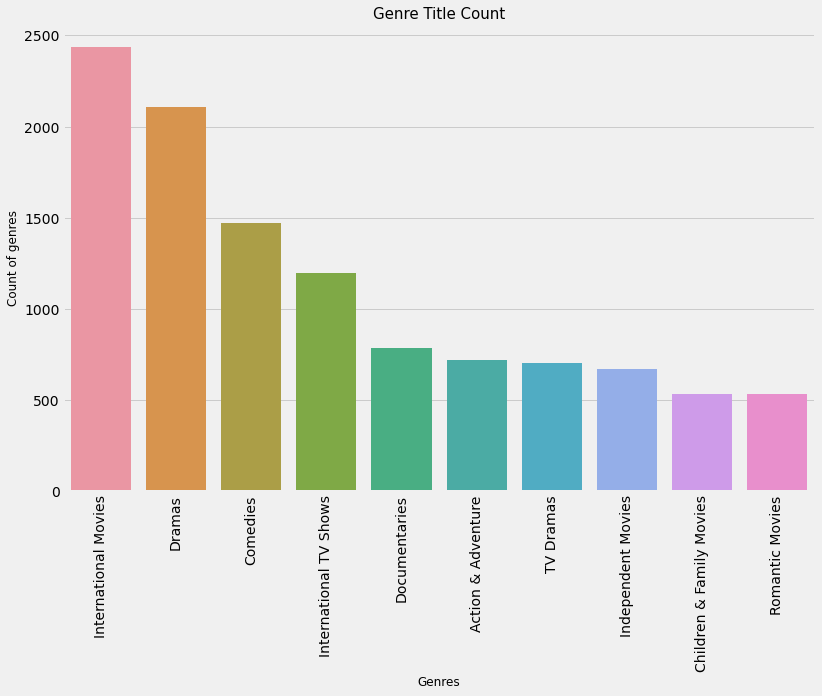

In [24]:
## Top 10 genre titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=listings_title[:10].index,y='count',data=listings_title[:10])
plt.ylabel("Count of genres",fontsize=12)
plt.xlabel("Genres",fontsize=12)
plt.title("Genre Title Count",fontsize=15)
plt.xticks(rotation=90)

From the plot of top 10 genre titles available,there are more than 2000+ titles listed as International Movies followed by ~2000 dramas and ~1300 comedies. 

### Countries of the titles:

It is not sure from the data description what exactly the countries column refer to -I am assuming it to be the country of origin of the title.Lets analyse this column in a similar way as that of listed_in column.

In [25]:
data['country']=data['country'].astype('str')
data['num_countries']=data['country'].apply(lambda x:len(x.split(",")))

country=set()
count_country=Counter()

for c in data['country']:
    if c not in ['nan','']:
        c=c.split(",")
        country.update([cs.strip() for cs in c])
        for cs in c:
            count_country[cs.strip()]+=1
        
        
countries_df=pd.DataFrame.from_dict(count_country,orient='index')
countries_df.sort_values(0,ascending=False,inplace=True)
countries_df.rename(columns={0:'count'},inplace=True)

In [26]:
data['num_countries'].describe()

count    7787.000000
mean        1.229485
std         0.668251
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: num_countries, dtype: float64

In [27]:
print(f'There are {len(country)} countries titles in the database')

There are 118 countries titles in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

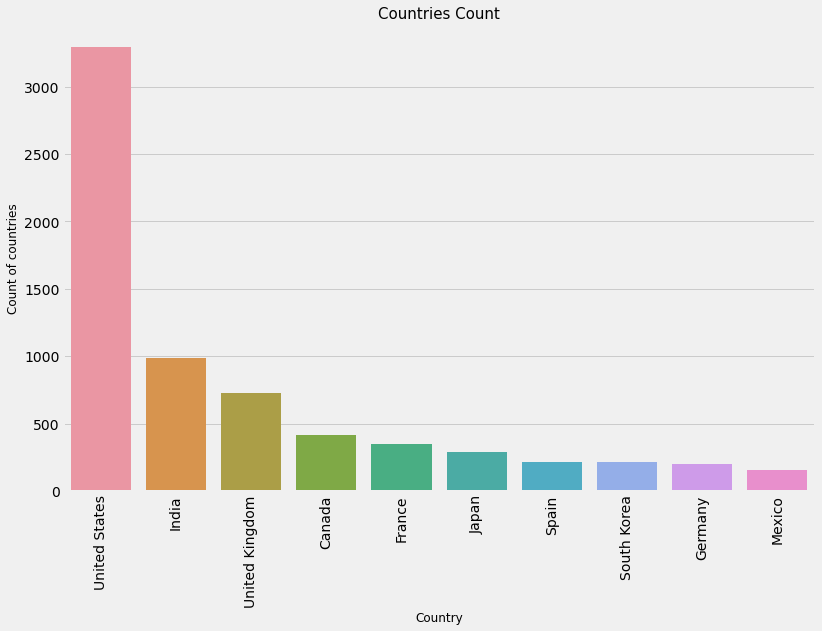

In [28]:
## Top 10 countries titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=countries_df[:10].index,y='count',data=countries_df[:10])
plt.ylabel("Count of countries",fontsize=12)
plt.xlabel("Country",fontsize=12)
plt.title("Countries Count",fontsize=15)
plt.xticks(rotation=90)

* There are 3000+ titles from United States followed by India and UK .But the difference in the number of titles of US and India is very high.

### Ratings 

In [29]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

TV-MA and TV-14 are the most common ratings available in this database.Lets check the rating with respect to type.


### Rating with respect to type

In [30]:
data.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       1845
         TV-14       1272
         R            663
         TV-PG        505
         PG-13        386
         PG           247
         TV-Y         117
         TV-G         111
         TV-Y7         95
         NR            79
         G             39
         TV-Y7-FV       5
         UR             5
         NC-17          3
TV Show  TV-MA       1018
         TV-14        659
         TV-PG        301
         TV-Y7        176
         TV-Y         163
         TV-G          83
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

There is no difference between the 1st and 2nd movie rating with respect to type.Is there any rating unique to a TV show or to a movie ?Lets check.

In [31]:
## check if there exist unique rating type in tv show 
set(data[data['type']=='TV Show'].rating.unique())-set(data[data['type']=='Movie'].rating.unique())

set()

In [32]:
#check if there exist unique movie rating type
set(data[data['type']=='Movie'].rating.unique())-set(data[data['type']=='TV Show'].rating.unique())

{'G', 'NC-17', 'PG', 'PG-13', 'UR'}

From the above output,it is seen that G,NC-17,PG,PG-13 and UR are only certified for movies and no tv show has this rating.

### Directors

In [33]:
## How many titles have more than one directors:
data['director']=data['director'].astype('str')
data['num_directors']=data['director'].apply(lambda x:len(x.split(",")))

In [34]:
multi_director=data.loc[data['num_directors']>1,]

In [35]:
multi_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,num_listing,num_countries,num_directors
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,2016-06-30,2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,2016.0,6.0,1,1,2
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,2019,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020.0,7.0,2,1,2
69,s70,Movie,14 Cameras,"Scott Hussion, Seth Fuller","Neville Archambault, Amber Midthunder, Brytnee...",United States,2018-10-27,2018,TV-MA,89 min,"Horror Movies, Thrillers","Upping the “13 Cameras” ante, this sequel find...",2018.0,10.0,2,1,2
70,s71,Movie,14 Minutes from Earth,"Adam Davis, Jerry Kolber, Trey Nelson, Erich S...",NaN,United States,2019-02-01,2016,TV-MA,84 min,Documentaries,A Google executive boldly attempts a death-def...,2019.0,2.0,1,1,4
77,s78,Movie,2 Alone in Paris,"Ramzy Bedia, Éric Judor","Ramzy Bedia, Éric Judor, Benoît Magimel, Krist...",France,2020-06-01,2008,TV-MA,97 min,"Comedies, International Movies",A bumbling Paris policeman is doggedly determi...,2020.0,6.0,2,1,2


In [36]:
multi_director['num_directors'].value_counts().sort_index()

2     492
3      32
4      13
5       5
7       1
8       1
9       1
10      3
11      2
12      2
13      1
Name: num_directors, dtype: int64

The maximum number of directors collaborated for a movie is 13.Let us check the titles where the number of directors is more than 5.

In [37]:
multi_director.loc[multi_director['num_directors']>5,['title','director','num_directors']].sort_values(by='num_directors',ascending=False)

,title,director,num_directors
7470,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...",13
2585,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
4244,Movie 43,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
5620,"Sincerely Yours, Dhaka","Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahma...",11
7684,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11
1809,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
3286,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
5863,Sturgill Simpson Presents Sound & Fury,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
2775,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...",9
6450,The Heyday of the Insensitive Bastards,"Mark Columbus, Lauren Hoekstra, Sarah Kruchows...",8


In [38]:
###Directors with most titles:
director=data.loc[data['director']!='nan','director'].str.split(",",expand=True).stack().reset_index()
director.rename(columns={0:'director'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Jan Suter'),
  Text(1, 0, 'Raúl Campos'),
  Text(2, 0, 'Marcus Raboy'),
  Text(3, 0, 'Jay Karas'),
  Text(4, 0, 'Cathy Garcia-Molina'),
  Text(5, 0, 'Jay Chapman'),
  Text(6, 0, 'Martin Scorsese'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Steven Spielberg'),
  Text(9, 0, 'David Dhawan')])

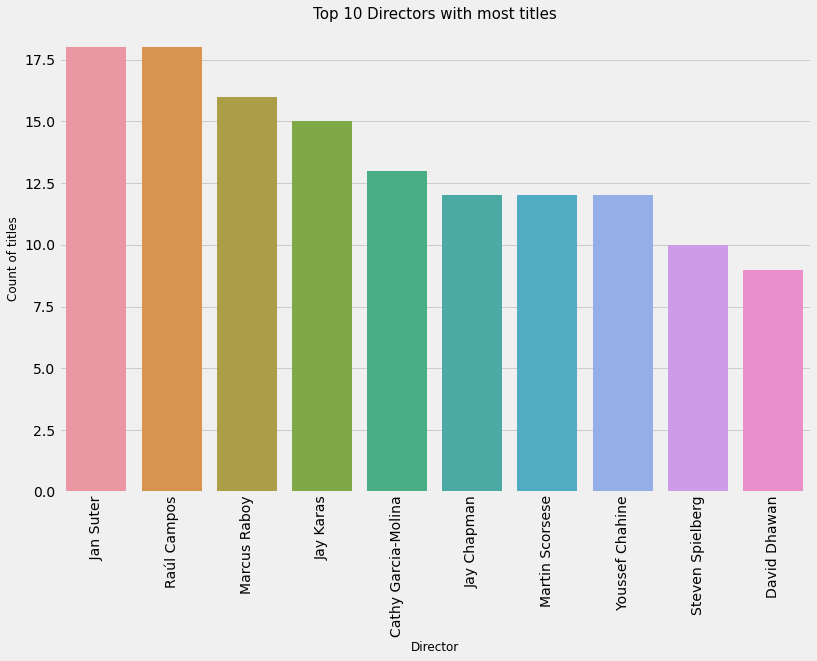

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(x=director['director'],data=director,order=director['director'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors with most titles",fontsize=15)
plt.xticks(rotation=90)

Raul Campos and Jan Suter are the directors having 18 titles each.Lets check individually by the type of title.

In [40]:
director=data.loc[data['director']!='nan',].set_index('type').director.str.split(",",expand=True).stack().reset_index('type')
director.rename(columns={0:'directors'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ken Burns'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Rob Seidenglanz'),
  Text(3, 0, 'Jung-ah Im'),
  Text(4, 0, 'Iginio Straffi'),
  Text(5, 0, 'Shin Won-ho'),
  Text(6, 0, 'Stan Lathan'),
  Text(7, 0, 'Michael Simon'),
  Text(8, 0, 'Mariano Barroso'),
  Text(9, 0, ' Rashida Jones')])

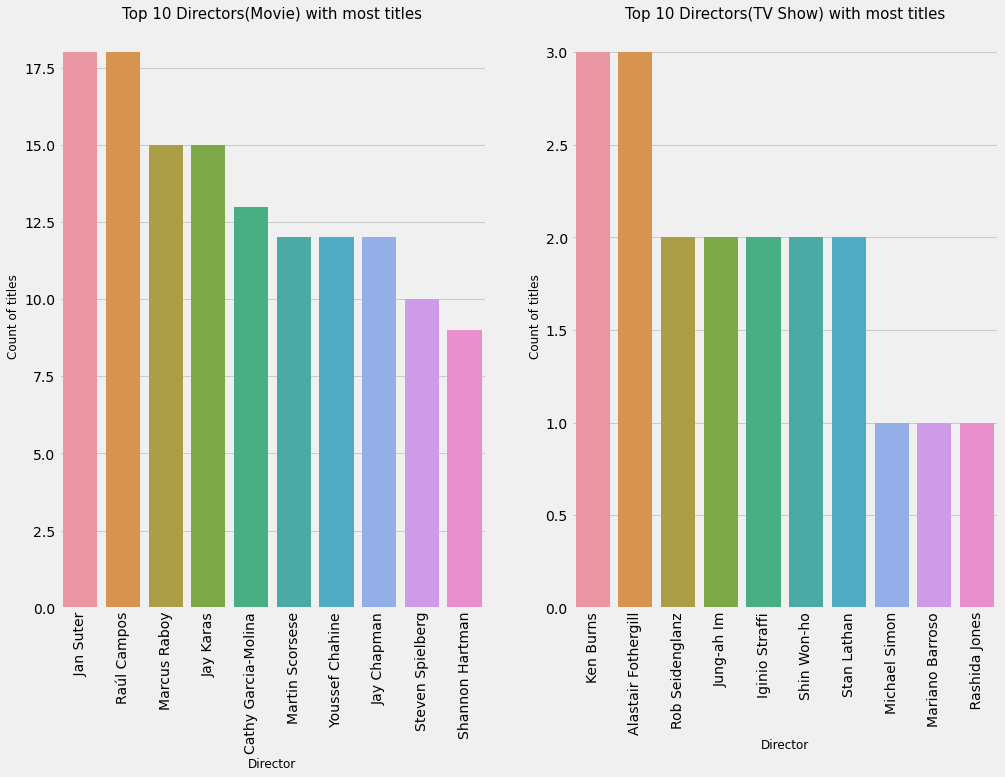

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(x=director.loc[director['type']=='Movie','directors'],data=director[director['type']=='Movie'],order=director.loc[director['type']=='Movie','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(Movie) with most titles",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=director.loc[director['type']=='TV Show','directors'],data=director[director['type']=='TV Show'],order=director.loc[director['type']=='TV Show','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(TV Show) with most titles",fontsize=15)
plt.xticks(rotation=90)

Analysing the top 10 list between movie and tv show , it is seen that there is no overlap between the directors.Lets check if there exist any director who have directed both a tv show and a movie.

In [42]:
### directors who have both tv show and movie title:
all_dup=director.groupby('directors')['type'].nunique()

In [43]:
all_dup[all_dup>1]

directors
 Alban Teurlai          2
 Anurag Kashyap         2
 Hiroyuki Seshita       2
 John Paul Tremblay     2
 Julia Reichert         2
 Mike Smith             2
 Robb Wells             2
 Ronna Gradus           2
Alastair Fothergill     2
Alessandro Angulo       2
Andrew Tan              2
Anurag Basu             2
BB Sasore               2
Cosima Spender          2
Dan Forrer              2
Daniel Kontur           2
David Ayer              2
Eli Roth                2
Estela Renner           2
Jalil Lespert           2
Jay Chandrasekhar       2
Jerry Seinfeld          2
Jill Bauer              2
Joe Berlinger           2
Justin Webster          2
Ken Burns               2
Kobun Shizuno           2
Kyran Kelly             2
Manolo Caro             2
Marcus Raboy            2
Mark Tonderai           2
Masaaki Yuasa           2
Mateo Gil               2
Michael Simon           2
Noam Murro              2
Obi Emelonye            2
Oliver Stone            2
Quentin Tarantino       2
Ro

The above directors have both tv show and movie to their credit.